In [1]:
#install data from github repo /RamiKrispin/coronavirus
install.packages("dplyr")
install.packages("ggplot2")
install.packages("GGally")
install.packages("readr")
install.packages("devtools")
devtools::install_github("RamiKrispin/coronavirus")
#install coronavirus library data bulk package
library(coronavirus)
update_dataset()

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pkgconfig’, ‘purrr’, ‘generics’, ‘tibble’, ‘tidyselect’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hms’, ‘prettyunits’, ‘cpp11’, ‘forcats’, ‘plyr’, ‘progress’, ‘reshape’, ‘tidyr’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘clipr’, ‘vroom’, ‘tzdb’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘askpass’, ‘credentials’, ‘openssl’, ‘sys’, ‘zip’, ‘gitcreds’, ‘ini’, ‘highr’, ‘xfun’, ‘diffobj’, ‘rematch2’, ‘gert’, ‘gh’, ‘rprojroot’, ‘yaml’, ‘processx’, ‘xopen’, ‘brew’, ‘knitr’, ‘stringi’, ‘stringr’, ‘xml2’, ‘brio’,

R6      (2.2.2 -> 2.5.1) [CRAN]
curl    (3.1   -> 4.3.2) [CRAN]
mime    (0.5   -> 0.11 ) [CRAN]
whisker (0.3-2 -> 0.4  ) [CRAN]


Installing 4 packages: R6, curl, mime, whisker

Installing packages into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmprD2tjj/remotes8f2190717a/RamiKrispin-coronavirus-ce9c445/DESCRIPTION’
─  preparing ‘coronavirus’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘coronavirus_0.3.30.tar.gz’
   


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Rows: 500598 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): province, country, type
dbl  (3): lat, long, cases
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

No updates are available



In [2]:
#package for reading csv
library(readr)

In [3]:
#plotting packages
library(ggplot2)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
#data
covid19_df <- refresh_coronavirus_jhu()
head(covid19_df)

,date,location,location_type,location_code,location_code_type,data_type,value,lat,long
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-12-30,Afghanistan,country,AF,iso_3166_2,cases_new,183,33.93911,67.70995
2,2021-02-20,Afghanistan,country,AF,iso_3166_2,cases_new,5,33.93911,67.70995
3,2021-02-08,Afghanistan,country,AF,iso_3166_2,cases_new,24,33.93911,67.70995
4,2021-02-11,Afghanistan,country,AF,iso_3166_2,cases_new,18,33.93911,67.70995
5,2021-02-06,Afghanistan,country,AF,iso_3166_2,cases_new,65,33.93911,67.70995
6,2021-02-10,Afghanistan,country,AF,iso_3166_2,cases_new,18,33.93911,67.70995


In [5]:
countries<-unique(covid19_df[,"location"])
print(countries)


  [1] "Afghanistan"                                                 
  [2] "Albania"                                                     
  [3] "Alberta, Canada"                                             
  [4] "Algeria"                                                     
  [5] "Andorra"                                                     
  [6] "Angola"                                                      
  [7] "Anguilla, United Kingdom"                                    
  [8] "Anhui, China"                                                
  [9] "Antigua and Barbuda"                                         
 [10] "Argentina"                                                   
 [11] "Armenia"                                                     
 [12] "Aruba, Netherlands"                                          
 [13] "Australian Capital Territory, Australia"                     
 [14] "Austria"                                                     
 [15] "Azerbaijan"                

In [8]:
advanced_countries<-countries[c(14,21,42,61, 78:79, 87, 122,124,170,174,183, 237,243:244,246,262,265)]
print(advanced_countries)

 [1] "Austria"        "Belarus"        "Canada"         "Denmark"       
 [5] "Finland"        "France"         "Germany"        "Italy"         
 [9] "Japan"          "Netherlands"    "New Zealand"    "Norway"        
[13] "Spain"          "Sweden"         "Switzerland"    "Taiwan*"       
[17] "United Kingdom" "US"            


Warning message:
“Transformation introduced infinite values in continuous y-axis”


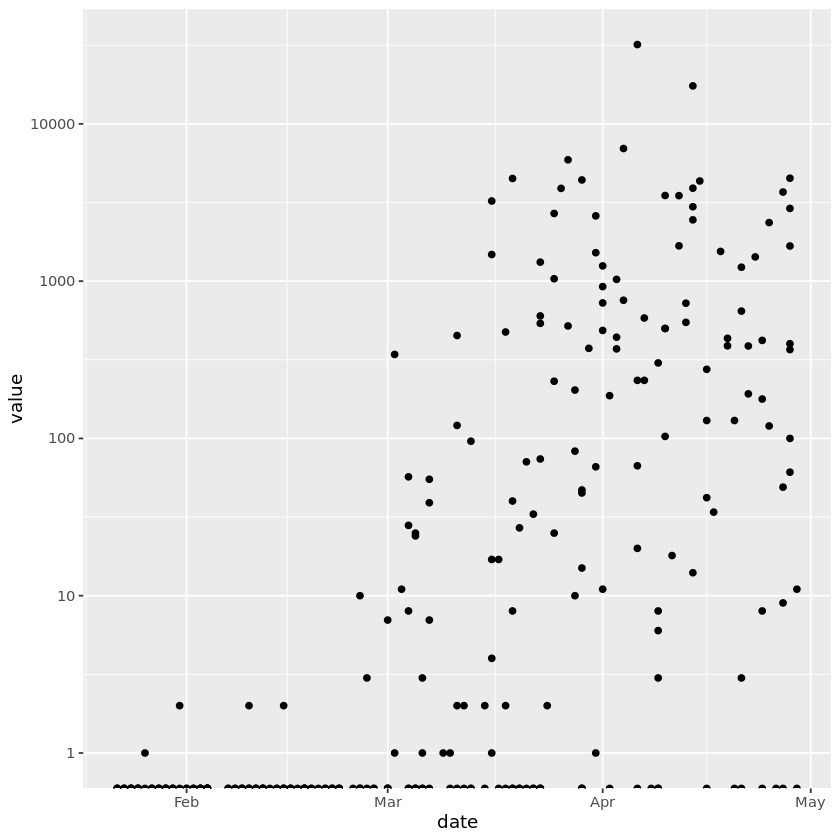

In [17]:
covid19_advanced_co_df<-covid19_df%>%
filter(location==advanced_countries,date<as.Date("2020-04-30"))
plot.1<-ggplot(data=covid19_advanced_co_df, aes(date,value))+geom_point()+scale_y_log10();plot.1

In [18]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))


In [19]:
plot.2<-ggplot(data=covid19_advanced_co_df, aes(date,value))+geom_point()+scale_y_log10()+
 geom_vline(data=who_events, aes(xintercept=date), linetype="dashed") +
  geom_text(data=who_events, aes(x=date, label=event, y=1e5))


Warning message:
“Transformation introduced infinite values in continuous y-axis”


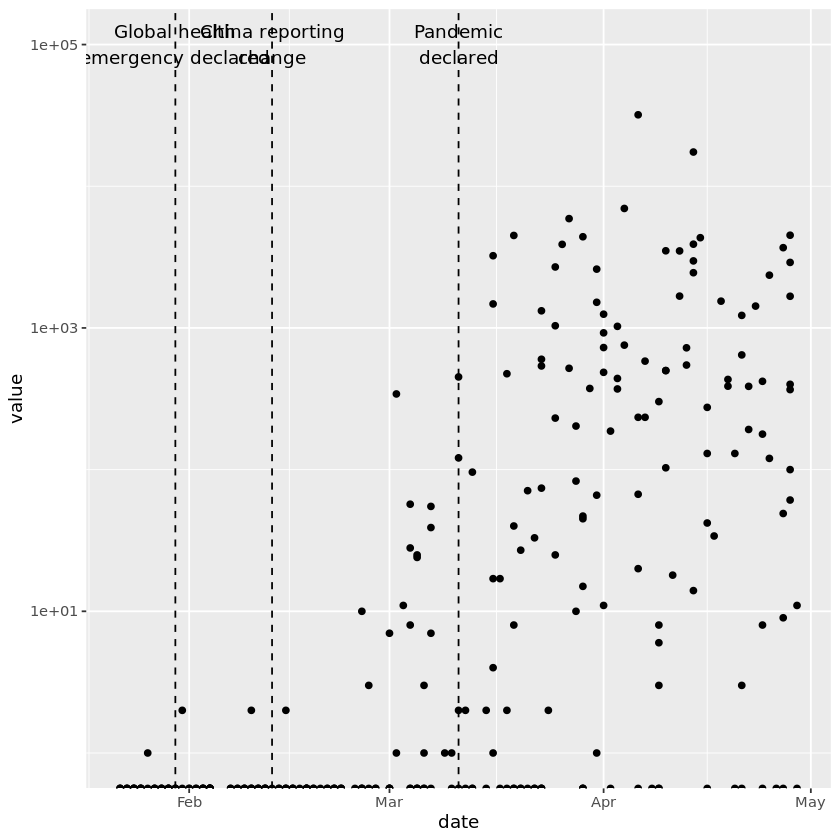

In [20]:
plot.2